This notebook is dedicated for the transit network analysis. I am going to combine and map the transit stations and lines of three dominating transit systems in New York Metro Areas, including the New Jersey Rail, Long Island Railroad and Metro-North Railroad.

In [1]:
#for general data wrangling
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

In [2]:
njrail=gpd.read_file('NJRail_line/Passenger_Railroad_Lines_in_NJ.shp')
njstation=gpd.read_file('NJRail_station/Railroad_Stations_in_NJ.shx')
lirail=gpd.read_file('LIRAILSTOP/shapes.shp')
listation=gpd.read_file('LIRAILSTOP/stops.shp')
mnrail=gpd.read_file('MNStation/mnline.json')
mnstation=gpd.read_file('MNStation/stops.json')

In [3]:
#looking at first 5 rows of the njrail, lirail and mnrail datasets. 
njrail.head()

,OBJECTID,RAIL_LINE,SERVICE,Shape_Leng,DATE_STAMP,geometry
0,1,ATLANTIC CITY RAIL LINE,None,356957.019400,2016-08-30,"LINESTRING (508669.853 193016.598, 505026.387 ..."
1,2,BERGEN COUNTY LINE,HOBOKEN,155780.575084,2013-11-04,"LINESTRING (622908.638 692949.426, 620720.513 ..."
2,3,MAIN LINE,HOBOKEN,161721.051881,2013-11-04,"LINESTRING (587611.064 830753.567, 588462.132 ..."
3,4,MEADOWLANDS RAIL LINE,None,56328.562168,2013-11-04,"LINESTRING (622908.638 692949.426, 620720.513 ..."
4,5,MONTCLAIR BOONTON LINE,NEW YORK CITY,328910.733006,2013-11-04,"LINESTRING (399357.761 735253.132, 399513.899 ..."


In [4]:
lirail.head()

,ROUTENAME,geometry
0,Babylon,"LINESTRING (-73.99309 40.75074, -73.99245 40.7..."
1,Babylon,"LINESTRING (-73.32470 40.70060, -73.32538 40.7..."
2,Babylon,"LINESTRING (-73.32470 40.70060, -73.32538 40.7..."
3,Babylon,"LINESTRING (-73.32470 40.70060, -73.32538 40.7..."
4,Babylon,"LINESTRING (-73.97736 40.68475, -73.97687 40.6..."


In [5]:
mnrail.head()

,id,route_id,route_long,geometry
0,nyu_2451_34755.1,1,Hudson,"MULTILINESTRING ((-73.93795 41.70584, -73.9472..."
1,nyu_2451_34755.2,3,New Haven,"MULTILINESTRING ((-72.92175 41.30498, -72.9282..."
2,nyu_2451_34755.3,2,Harlem,"MULTILINESTRING ((-73.56220 41.81472, -73.5582..."
3,nyu_2451_34755.4,5,Danbury,"MULTILINESTRING ((-73.45016 41.39636, -73.4181..."
4,nyu_2451_34755.5,4,New Canaan,"MULTILINESTRING ((-73.49563 41.14630, -73.4981..."


As you can see from the first few rows of the three rail line datasets, they all have different columns, however, they all have a few things in common, including the name of each rail line and geometry, but those two columns in the three datasets have different names, so I need to change column names to merge them together into one new dataframe. 

In [6]:
list(njrail)

['OBJECTID', 'RAIL_LINE', 'SERVICE', 'Shape_Leng', 'DATE_STAMP', 'geometry']

In [10]:
njrail.columns=['id','linename','service','shape_leng','date_stamp','geometry']
njrail.head()

,id,linename,service,shape_leng,date_stamp,geometry
0,1,ATLANTIC CITY RAIL LINE,None,356957.019400,2016-08-30,"LINESTRING (508669.853 193016.598, 505026.387 ..."
1,2,BERGEN COUNTY LINE,HOBOKEN,155780.575084,2013-11-04,"LINESTRING (622908.638 692949.426, 620720.513 ..."
2,3,MAIN LINE,HOBOKEN,161721.051881,2013-11-04,"LINESTRING (587611.064 830753.567, 588462.132 ..."
3,4,MEADOWLANDS RAIL LINE,None,56328.562168,2013-11-04,"LINESTRING (622908.638 692949.426, 620720.513 ..."
4,5,MONTCLAIR BOONTON LINE,NEW YORK CITY,328910.733006,2013-11-04,"LINESTRING (399357.761 735253.132, 399513.899 ..."


In [80]:
#Let's add a new column called "operating" to the mnrail dataframe to distinguish it from two other rail line dataframes.
njrail['Operating'] = 'New Jersey Railroad'
njrail.head()

,id,linename,service,shape_leng,date_stamp,geometry,Operating
0,1,ATLANTIC CITY RAIL LINE,None,356957.019400,2016-08-30,"LINESTRING (508669.853 193016.598, 505026.387 ...",New Jersey Railroad
1,2,BERGEN COUNTY LINE,HOBOKEN,155780.575084,2013-11-04,"LINESTRING (622908.638 692949.426, 620720.513 ...",New Jersey Railroad
2,3,MAIN LINE,HOBOKEN,161721.051881,2013-11-04,"LINESTRING (587611.064 830753.567, 588462.132 ...",New Jersey Railroad
3,4,MEADOWLANDS RAIL LINE,None,56328.562168,2013-11-04,"LINESTRING (622908.638 692949.426, 620720.513 ...",New Jersey Railroad
4,5,MONTCLAIR BOONTON LINE,NEW YORK CITY,328910.733006,2013-11-04,"LINESTRING (399357.761 735253.132, 399513.899 ...",New Jersey Railroad


In [11]:
list(lirail)

['ROUTENAME', 'geometry']

In [12]:
lirail.columns=['linename','geometry']
lirail.head()

,linename,geometry
0,Babylon,"LINESTRING (-73.99309 40.75074, -73.99245 40.7..."
1,Babylon,"LINESTRING (-73.32470 40.70060, -73.32538 40.7..."
2,Babylon,"LINESTRING (-73.32470 40.70060, -73.32538 40.7..."
3,Babylon,"LINESTRING (-73.32470 40.70060, -73.32538 40.7..."
4,Babylon,"LINESTRING (-73.97736 40.68475, -73.97687 40.6..."


In [79]:
#Let's add a new column called "operating" to the mnrail dataframe to distinguish it from two other rail line dataframes.
lirail['Operating'] = 'Long Island Railroad'
lirail.head()

,linename,geometry,Operating
0,Babylon,"LINESTRING (632561.894 698796.549, 632740.203 ...",Long Island Railroad
1,Babylon,"LINESTRING (817980.674 682303.329, 817794.674 ...",Long Island Railroad
2,Babylon,"LINESTRING (817980.674 682303.329, 817794.674 ...",Long Island Railroad
3,Babylon,"LINESTRING (817980.674 682303.329, 817794.674 ...",Long Island Railroad
4,Babylon,"LINESTRING (637060.811 674781.164, 637199.840 ...",Long Island Railroad


In [13]:
list(mnrail)

['id', 'route_id', 'route_long', 'geometry']

In [16]:
mnrail.columns=['id','name','route_long','geometry']
mnrail.head()

,id,name,route_long,geometry
0,nyu_2451_34755.1,1,Hudson,"MULTILINESTRING ((-73.93795 41.70584, -73.9472..."
1,nyu_2451_34755.2,3,New Haven,"MULTILINESTRING ((-72.92175 41.30498, -72.9282..."
2,nyu_2451_34755.3,2,Harlem,"MULTILINESTRING ((-73.56220 41.81472, -73.5582..."
3,nyu_2451_34755.4,5,Danbury,"MULTILINESTRING ((-73.45016 41.39636, -73.4181..."
4,nyu_2451_34755.5,4,New Canaan,"MULTILINESTRING ((-73.49563 41.14630, -73.4981..."


Now we have changed the names of shared columns (names and geometry) in three dataframe to the same names.

I also noticed that in the geometry columns of the three transit line datasets that they do not use the same geometry coordination system, so I'm going to change them to share the same coordination system.

In [21]:
lirail=lirail.to_crs('epsg:3424')
lirail.head()

,linename,geometry
0,Babylon,"LINESTRING (632561.894 698796.549, 632740.203 ..."
1,Babylon,"LINESTRING (817980.674 682303.329, 817794.674 ..."
2,Babylon,"LINESTRING (817980.674 682303.329, 817794.674 ..."
3,Babylon,"LINESTRING (817980.674 682303.329, 817794.674 ..."
4,Babylon,"LINESTRING (637060.811 674781.164, 637199.840 ..."


In [22]:
mnrail=mnrail.to_crs('epsg:3424')
mnrail.head()

,id,name,route_long,geometry
0,nyu_2451_34755.1,1,Hudson,"MULTILINESTRING ((645588.804 1046859.351, 6433..."
1,nyu_2451_34755.2,3,New Haven,"MULTILINESTRING ((925725.242 904249.608, 92398..."
2,nyu_2451_34755.3,2,Harlem,"MULTILINESTRING ((747752.029 1087426.164, 7489..."
3,nyu_2451_34755.4,5,Danbury,"MULTILINESTRING ((780145.485 935346.610, 78901..."
4,nyu_2451_34755.5,4,New Canaan,"MULTILINESTRING ((768726.204 844093.227, 76815..."


In [78]:
#Let's add a new column called "operating" to the mnrail dataframe to distinguish it from two other rail line dataframes.
mnrail['Operating'] = 'Metro North'
mnrail.head()

,id,name,route_long,geometry,Operating
0,nyu_2451_34755.1,1,Hudson,"MULTILINESTRING ((645588.804 1046859.351, 6433...",Metro North
1,nyu_2451_34755.2,3,New Haven,"MULTILINESTRING ((925725.242 904249.608, 92398...",Metro North
2,nyu_2451_34755.3,2,Harlem,"MULTILINESTRING ((747752.029 1087426.164, 7489...",Metro North
3,nyu_2451_34755.4,5,Danbury,"MULTILINESTRING ((780145.485 935346.610, 78901...",Metro North
4,nyu_2451_34755.5,4,New Canaan,"MULTILINESTRING ((768726.204 844093.227, 76815...",Metro North


Now the geometry columns of the three dataframes share the same coordination system, and we can merge them into one dataframe now. But before we do that, let's just look at the data types of the three dataframes.

In [81]:
#check datatypes of columns
njrail.dtypes

id               int64
linename        object
service         object
shape_leng     float64
date_stamp      object
geometry      geometry
Operating       object
dtype: object

In [82]:
lirail.dtypes

linename       object
geometry     geometry
Operating      object
dtype: object

In [83]:
mnrail.dtypes

id              object
name             int64
route_long      object
geometry      geometry
Operating       object
dtype: object

Let's combine the three rail line dataframe into a new one. 

In [84]:
linjrail = lirail.append(njrail)
nymarail=linjrail.append(mnrail)

In [85]:
#Let's sample the new datagframe with the combined rail lines to make sure there are values from all three dataframes. 
nymarail.sample(10)

,linename,geometry,Operating,id,service,shape_leng,date_stamp,name,route_long
32,Port Jefferson,"LINESTRING (793758.701 737520.987, 793941.210 ...",Long Island Railroad,NaN,NaN,NaN,NaN,NaN,NaN
36,Port Jefferson,"LINESTRING (892009.625 768639.486, 891874.305 ...",Long Island Railroad,NaN,NaN,NaN,NaN,NaN,NaN
155,City Zone,"LINESTRING (637060.811 674781.164, 637199.840 ...",Long Island Railroad,NaN,NaN,NaN,NaN,NaN,NaN
137,Montauk,"LINESTRING (903019.107 705831.982, 902828.968 ...",Long Island Railroad,NaN,NaN,NaN,NaN,NaN,NaN
54,Hempstead,"LINESTRING (637060.811 674781.164, 637199.840 ...",Long Island Railroad,NaN,NaN,NaN,NaN,NaN,NaN
33,Port Jefferson,"LINESTRING (892009.625 768639.486, 891874.305 ...",Long Island Railroad,NaN,NaN,NaN,NaN,NaN,NaN
9,Ronkonkoma,"LINESTRING (1081003.026 832721.398, 1080858.95...",Long Island Railroad,NaN,NaN,NaN,NaN,NaN,NaN
22,Oyster Bay,"LINESTRING (683803.862 680563.808, 683990.977 ...",Long Island Railroad,NaN,NaN,NaN,NaN,NaN,NaN
129,Montauk,"LINESTRING (988839.717 729184.806, 988642.491 ...",Long Island Railroad,NaN,NaN,NaN,NaN,NaN,NaN
133,Montauk,"LINESTRING (632561.894 698796.549, 632740.203 ...",Long Island Railroad,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#Let's clean up the data a little more and get rid of the columns where there are some rows without value.
columns_to_keep=['linename','geometry','Operating']
nymarail=nymarail[columns_to_keep]
nymarail.sample(10)

,linename,geometry,Operating
40,Port Jefferson,"LINESTRING (892009.625 768639.486, 891874.305 ...",Long Island Railroad
106,Ronkonkoma,"LINESTRING (877897.967 722347.292, 877699.622 ...",Long Island Railroad
150,City Zone,"LINESTRING (683776.036 680518.585, 683629.018 ...",Long Island Railroad
30,Oyster Bay,"LINESTRING (642849.819 695397.105, 643044.915 ...",Long Island Railroad
73,City Zone,"LINESTRING (683776.036 680518.585, 683629.018 ...",Long Island Railroad
95,Port Jefferson,"LINESTRING (793576.289 737438.971, 793393.789 ...",Long Island Railroad
16,PORT JERVIS LINE,"LINESTRING (622908.638 692949.426, 620720.513 ...",New Jersey Railroad
13,NORTHEAST CORRIDOR LINE,"LINESTRING (458356.477 540953.196, 458004.667 ...",New Jersey Railroad
166,Montauk,"LINESTRING (818168.589 682371.770, 818358.144 ...",Long Island Railroad
0,NaN,"MULTILINESTRING ((645588.804 1046859.351, 6433...",Metro North


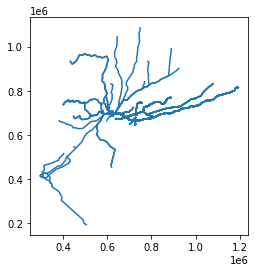

In [87]:
#Let's plot the combined rail lines onto the map
nymarail.plot()

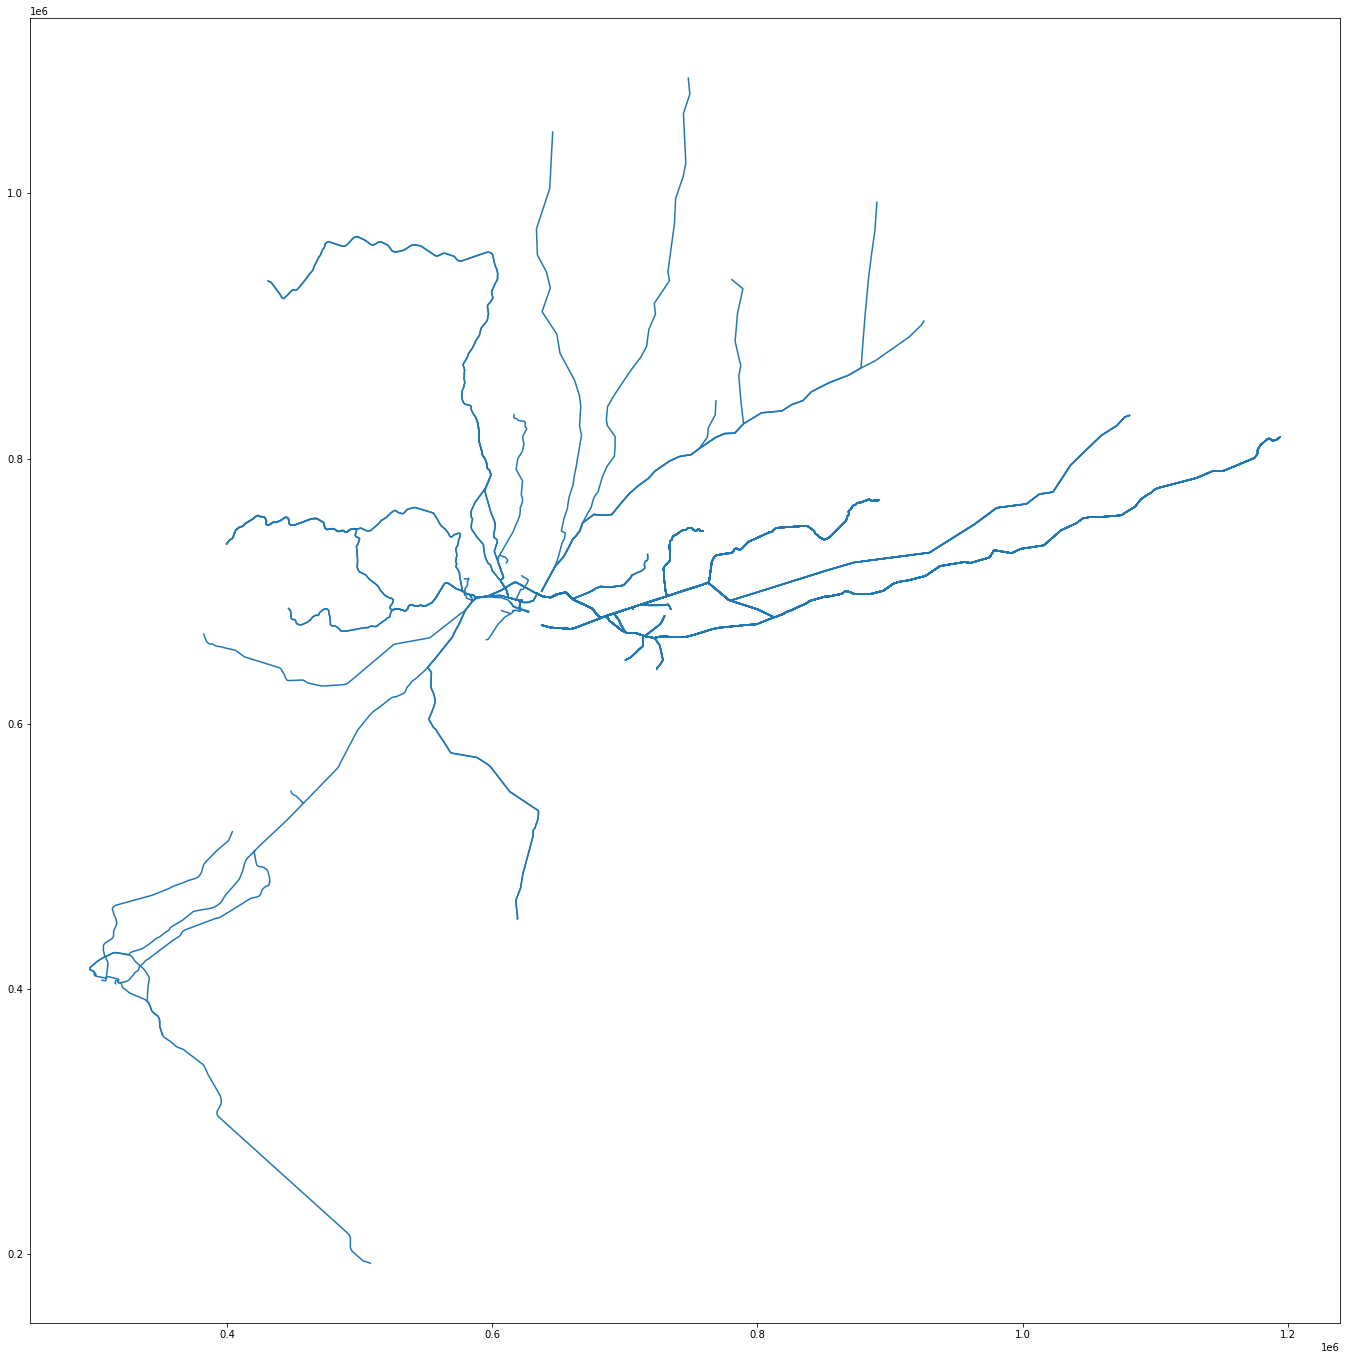

In [88]:
#Let's make it look better
nymarail.plot(figsize=(40,24)) 

Let's do the same thing with the station datasets.

In [37]:
#looking at first 5 rows of the njstation, listation and mnstation datasets. 
njstation.head()

,OBJECTID,COUNTY,LATITUDE,LONGITUDE,STATION,RAIL_LINE,MUN_LABEL,ATIS_ID,AMTRAK,geometry
0,1,OCEAN,40.092718,-74.048192,Point Pleasant,North Jersey Coast Line,Point Pleasant Beach Borough,RAIL0122,N,POINT (618521.134 459008.903)
1,2,MONMOUTH,40.150567,-74.035460,Spring Lake,North Jersey Coast Line,Spring Lake Borough,RAIL0141,N,POINT (621972.996 480099.144)
2,3,MONMOUTH,40.180589,-74.027296,Belmar,North Jersey Coast Line,Belmar Borough,RAIL0015,N,POINT (624196.751 491047.221)
3,4,MONMOUTH,40.203775,-74.018956,Bradley Beach,North Jersey Coast Line,Bradley Beach Borough,RAIL0022,N,POINT (626480.961 499505.650)
4,5,MONMOUTH,40.215360,-74.014788,Asbury Park,North Jersey Coast Line,Asbury Park City,RAIL0008,N,POINT (627622.290 503731.988)


In [38]:
listation.head()

,STOPNAME,geometry
0,Long Island City,POINT (-73.95639 40.74128)
1,Hunterspoint Avenue,POINT (-73.94679 40.74238)
2,Penn Station,POINT (-73.99358 40.75058)
3,Woodside,POINT (-73.90297 40.74584)
4,Forest Hills,POINT (-73.84481 40.71957)


There are 277 stations in the NJ Rail network and some has multiple values, meaning there are more than 1 lines intersecting at those staions.

In [39]:
mnstation.head()

,id,stop_id,stop_name,stop_lat,stop_lon,wheelchair,geoid,namelsad,geometry
0,nyu_2451_34756.1,1,Grand Central,40.752998,-73.977056,1,36061,New York County,POINT (-73.97706 40.75300)
1,nyu_2451_34756.2,4,Harlem-125th St.,40.805157,-73.939149,1,36061,New York County,POINT (-73.93915 40.80516)
2,nyu_2451_34756.3,622,Yankees-E153 St.,40.825300,-73.929900,1,36005,Bronx County,POINT (-73.92990 40.82530)
3,nyu_2451_34756.4,9,Morris Heights,40.854252,-73.919583,1,36005,Bronx County,POINT (-73.91958 40.85425)
4,nyu_2451_34756.5,10,University Heights,40.862248,-73.913120,1,36005,Bronx County,POINT (-73.91312 40.86225)


Again, three dataframes share the names and the geometry columns, and let's change the names of those two columns. From the data exploration and analysis for the rail line dataframes, I know I don't need to keep all the columns as well, so I will drop the columns that are not shared across the dataframes.

In [42]:
list(njstation)

['OBJECTID',
 'COUNTY',
 'LATITUDE',
 'LONGITUDE',
 'STATION',
 'RAIL_LINE',
 'MUN_LABEL',
 'ATIS_ID',
 'AMTRAK',
 'geometry']

In [50]:
columns_to_keep=['STATION','geometry']
njstation=njstation[columns_to_keep]
njstation.head()

KeyError: "['STATION'] not in index"

In [51]:
njstation.head()

,stationname,geometry
0,Point Pleasant,POINT (618521.134 459008.903)
1,Spring Lake,POINT (621972.996 480099.144)
2,Belmar,POINT (624196.751 491047.221)
3,Bradley Beach,POINT (626480.961 499505.650)
4,Asbury Park,POINT (627622.290 503731.988)


In [54]:
listation.columns=['stationname','geometry']
listation.head()

,stationname,geometry
0,Long Island City,POINT (-73.95639 40.74128)
1,Hunterspoint Avenue,POINT (-73.94679 40.74238)
2,Penn Station,POINT (-73.99358 40.75058)
3,Woodside,POINT (-73.90297 40.74584)
4,Forest Hills,POINT (-73.84481 40.71957)


In [57]:
columns_to_keep=['stop_name','geometry']
mnstation=mnstation[columns_to_keep]
mnstation.head()

,stop_name,geometry
0,Grand Central,POINT (-73.97706 40.75300)
1,Harlem-125th St.,POINT (-73.93915 40.80516)
2,Yankees-E153 St.,POINT (-73.92990 40.82530)
3,Morris Heights,POINT (-73.91958 40.85425)
4,University Heights,POINT (-73.91312 40.86225)


In [59]:
mnstation.columns=['stationname','geometry']
mnstation.head()

,stationname,geometry
0,Grand Central,POINT (-73.97706 40.75300)
1,Harlem-125th St.,POINT (-73.93915 40.80516)
2,Yankees-E153 St.,POINT (-73.92990 40.82530)
3,Morris Heights,POINT (-73.91958 40.85425)
4,University Heights,POINT (-73.91312 40.86225)


Now we have changed the column names for station and geometry to the same across the three dataframes, but I noticed that the coordination system for geometry columns are different, I need to change them to the same coordination system for mapping purpose

In [61]:
listation=listation.to_crs('epsg:3424')
listation.head()

,stationname,geometry
0,Long Island City,POINT (642750.072 695409.903)
1,Hunterspoint Avenue,POINT (645407.555 695827.249)
2,Penn Station,POINT (632425.769 698736.255)
3,Woodside,POINT (657540.623 697167.271)
4,Forest Hills,POINT (673726.190 687712.061)


In [62]:
mnstation=mnstation.to_crs('epsg:3424')
mnstation.head()

,stationname,geometry
0,Grand Central,POINT (636998.419 699643.976)
1,Harlem-125th St.,POINT (647378.517 718710.419)
2,Yankees-E153 St.,POINT (649891.090 726065.105)
3,Morris Heights,POINT (652676.295 736631.220)
4,University Heights,POINT (654444.539 739556.129)


Time to combine the three dataframes.

In [65]:
linjstation= listation.append(njstation)
nymastation=linjstation.append(mnstation)
nymastation.sample(10)

,stationname,geometry
179,E. 34th St.,POINT (601002.779 669888.172)
95,Rockville Centre,POINT (728895.855 665867.074)
58,Bethpage,POINT (773790.664 697211.981)
193,Newport,POINT (620654.607 690014.881)
173,World Trade Center,POINT (627365.098 684393.482)
62,Deer Park,POINT (826270.690 707514.198)
282,Eddington,POINT (370776.718 455441.562)
12,Murray Hill,POINT (681993.599 703488.376)
4,University Heights,POINT (654444.539 739556.129)
224,Florence,POINT (406778.293 461487.069)


Time to plot the combined station dataframe onto the map

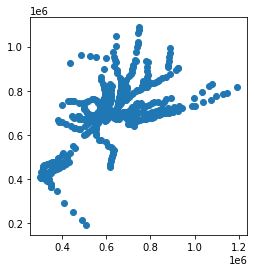

In [67]:
nymastation.plot()

Let's make it look better:

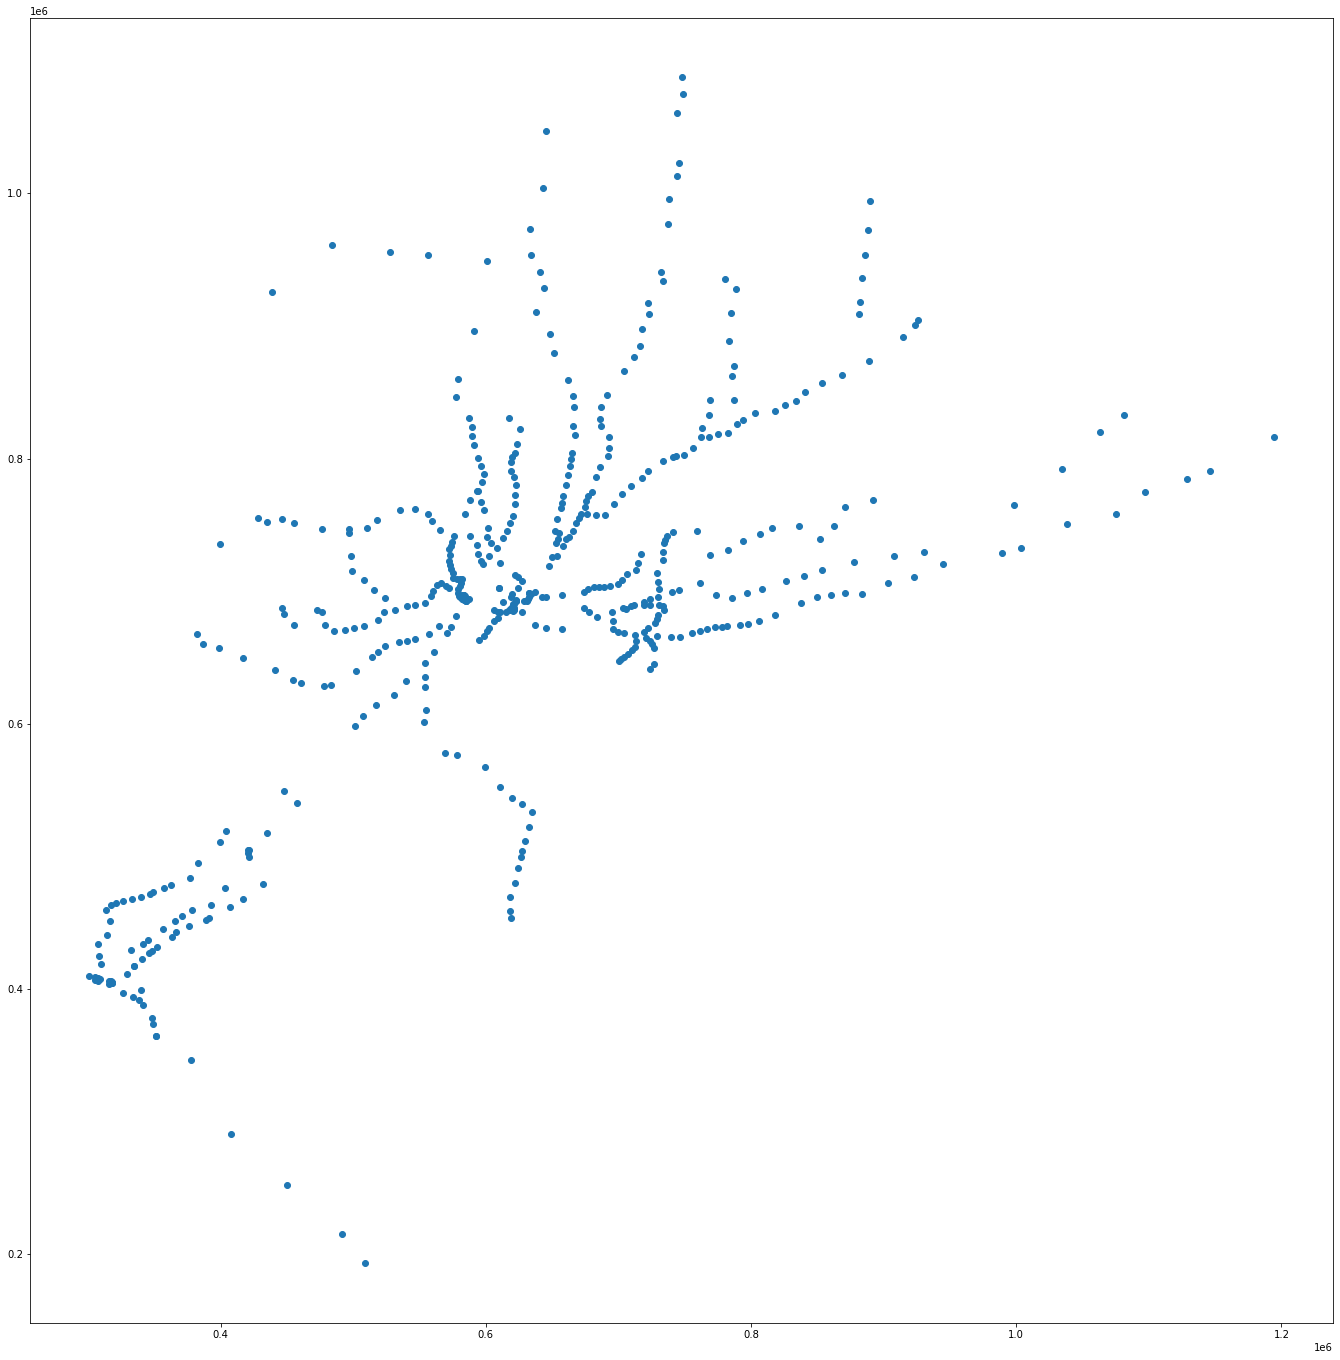

In [70]:
nymastation.plot(
            figsize=(40,24)) 

Now I have the two new dataframes with combines lines and stations, I want to plot them onto the county boundary map.

In [71]:
#import county boundary shapefile
cb=gpd.read_file('NYMRcb')

In [72]:
#quick look at the dataframe--I'm looking at geometry column especially to see if there is a need to convert the coordination system
cb.head()

,cartodb_id,statefp,countyfp,geoid,name,subregid,atotal,aland,pop_10e,pop_10m,...,cr_oth_e,cr_oth_m,cr_oth_c,cr_hom_e,cr_hom_m,cr_hom_c,iscommap,iscomnycre,iscomnycwo,geometry
0,1,09,001,09001,"Fairfield County, Connecticut",CT,836.91795,624.96958,916829,0,...,344,363.225722,64.187765,0,0.000000,0.000000,0,1,1,"MULTIPOLYGON (((-73.60428 41.01486, -73.60471 ..."
1,10,34,025,34025,"Monmouth County, New Jersey",ONJ,665.31546,468.40775,630380,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0,1,1,"MULTIPOLYGON (((-73.99367 40.23651, -73.99377 ..."
2,25,36,081,36081,"Queens County, New York",NYC,178.03032,108.76805,2230722,0,...,9887,1864.166774,11.461840,35072,3689.568791,6.395127,0,1,1,"MULTIPOLYGON (((-73.83039 40.60801, -73.83033 ..."
3,2,09,005,09005,"Litchfield County, Connecticut",CT,944.55528,920.56844,189927,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0,1,1,"POLYGON ((-72.98325 41.63960, -73.00315 41.629..."
4,19,36,027,36027,"Dutchess County, New York",MHV,825.34308,795.63519,297488,0,...,77,132.008047,104.218251,0,0.000000,0.000000,0,1,1,"POLYGON ((-73.48731 42.04964, -73.48731 42.049..."


In [74]:
#convert the coordination system to match with the line and station dataframes
cb=cb.to_crs('epsg:3424')
cb.head()

,cartodb_id,statefp,countyfp,geoid,name,subregid,atotal,aland,pop_10e,pop_10m,...,cr_oth_e,cr_oth_m,cr_oth_c,cr_hom_e,cr_hom_m,cr_hom_c,iscommap,iscomnycre,iscomnycwo,geometry
0,1,09,001,09001,"Fairfield County, Connecticut",CT,836.91795,624.96958,916829,0,...,344,363.225722,64.187765,0,0.000000,0.000000,0,1,1,"MULTIPOLYGON (((739294.387 795879.033, 739178...."
1,10,34,025,34025,"Monmouth County, New Jersey",ONJ,665.31546,468.40775,630380,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0,1,1,"MULTIPOLYGON (((633476.713 511467.499, 633447...."
2,25,36,081,36081,"Queens County, New York",NYC,178.03032,108.76805,2230722,0,...,9887,1864.166774,11.461840,35072,3689.568791,6.395127,0,1,1,"MULTIPOLYGON (((678032.841 647101.049, 678050...."
3,2,09,005,09005,"Litchfield County, Connecticut",CT,944.55528,920.56844,189927,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0,1,1,"POLYGON ((906689.771 1025869.682, 901318.076 1..."
4,19,36,027,36027,"Dutchess County, New York",MHV,825.34308,795.63519,297488,0,...,77,132.008047,104.218251,0,0.000000,0.000000,0,1,1,"POLYGON ((767152.805 1173256.139, 767152.776 1..."


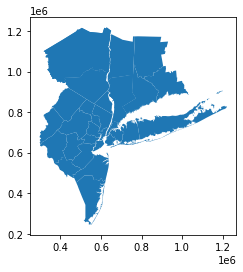

In [75]:
cb.plot()

Let's make it look better and put the line dataframe onto the county border map

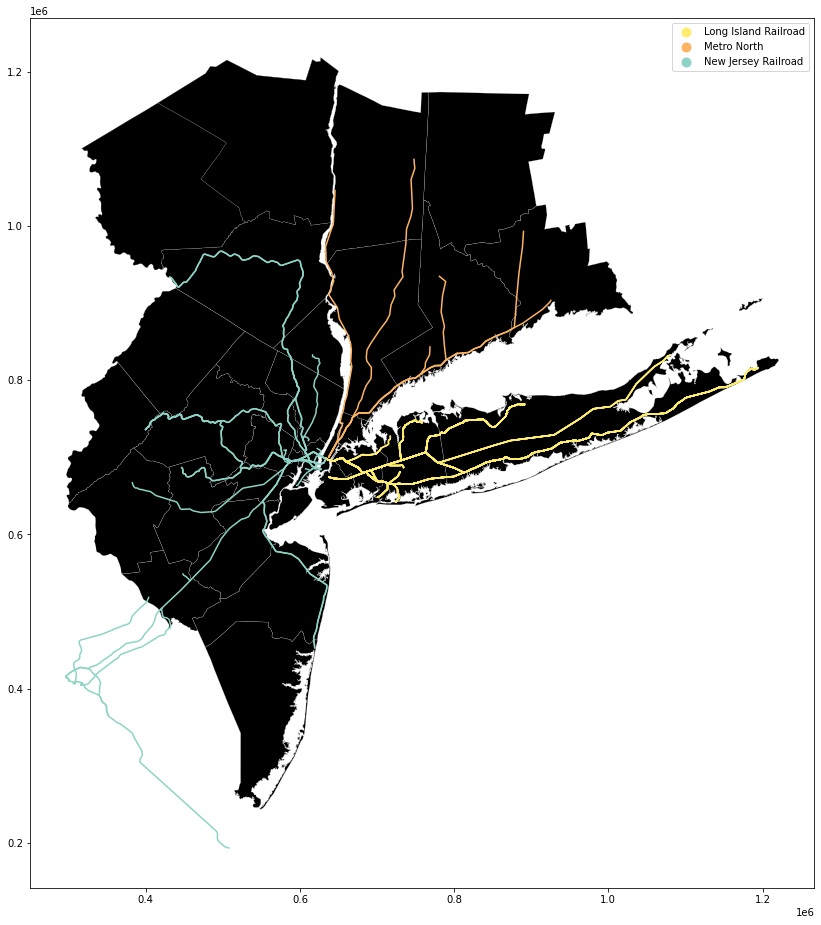

In [89]:
fig, ax = plt.subplots(figsize = (20,16)) 
nymarail.plot(column = 'Operating',cmap = 'Set3_r', legend=True, ax=ax)
cb.geometry.plot(color='black',edgecolor='gainsboro',linewidth = 0.2,ax=ax) 

In [90]:
#Let's add the stations on to the county boundary map
stationincounty = gpd.sjoin(nymastation, cb, op='within') 

In [91]:
stationincounty.head()

,stationname,geometry,index_right,cartodb_id,statefp,countyfp,geoid,name,subregid,atotal,...,cr_bw_c,cr_oth_e,cr_oth_m,cr_oth_c,cr_hom_e,cr_hom_m,cr_hom_c,iscommap,iscomnycre,iscomnycwo
0,Long Island City,POINT (642750.072 695409.903),2,25,36,081,36081,"Queens County, New York",NYC,178.03032,...,6.017308,9887,1864.166774,11.46184,35072,3689.568791,6.395127,0,1,1
1,Hunterspoint Avenue,POINT (645407.555 695827.249),2,25,36,081,36081,"Queens County, New York",NYC,178.03032,...,6.017308,9887,1864.166774,11.46184,35072,3689.568791,6.395127,0,1,1
3,Woodside,POINT (657540.623 697167.271),2,25,36,081,36081,"Queens County, New York",NYC,178.03032,...,6.017308,9887,1864.166774,11.46184,35072,3689.568791,6.395127,0,1,1
4,Forest Hills,POINT (673726.190 687712.061),2,25,36,081,36081,"Queens County, New York",NYC,178.03032,...,6.017308,9887,1864.166774,11.46184,35072,3689.568791,6.395127,0,1,1
5,Kew Gardens,POINT (677612.026 684123.665),2,25,36,081,36081,"Queens County, New York",NYC,178.03032,...,6.017308,9887,1864.166774,11.46184,35072,3689.568791,6.395127,0,1,1


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


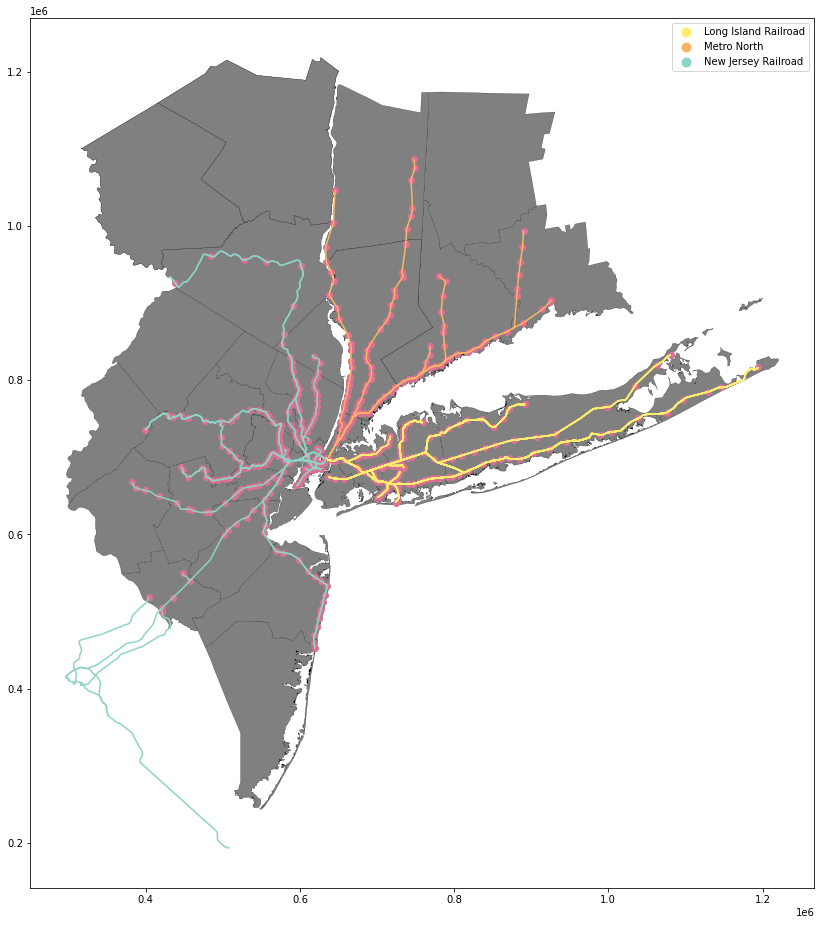

In [94]:
fig, ax = plt.subplots(figsize = (20,16)) 

nymarail.plot(column = 'Operating',cmap = 'Set3_r', legend=True, ax=ax)
cb.geometry.plot(color='Grey', edgecolor='black',linewidth = 0.2,ax=ax)
stationincounty.plot(column = 'name',color='palevioletred', legend=True, ax=ax)